# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [11]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt

# Решение 
1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [40]:
def function_exp(x):
    f_x = np.sin(x/5.0)*np.exp(x/10.0) + 5*np.exp(-x/.2) 
    return f_x
print(function_exp(15.0))

0.6324559977279265


In [31]:
a = np.array([[1.0, 1.0], [1.0, 15.0]])
b = np.array([function_exp(1.0), function_exp(15.0)])
x = np.linalg.solve(a, b)
print("Матрица A:\n", a)
print("Вектор b:\n", b)
print("Решение системы:\n", x)

Матрица A:
 [[ 1.  1.]
 [ 1. 15.]]
Вектор b:
 [0.2532533 0.632456 ]
Решение системы:
 [0.22616739 0.02708591]


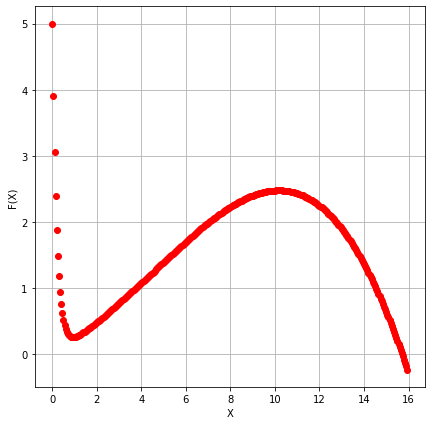

In [41]:
x_ideal = np.arange(0.0, 16.0, 0.05)
y_ideal = []
for p in range(x_ideal.size):
    y_ideal.append(function_exp(x_ideal[p]))

plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')

plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid(True)
plt.show()